# **Foundations of Machine Learning: Final Project**
## Professor: Fragkiskos Malliaros
## Due: January 14th, 2024

### **Name: Mounika Thatha (B00810890), Ignacio Correa (B00810675), Felipe Ibarra (B00814121), Xiaoqing Wang (B00810695)**
---

## Section 1: Preprocess & Exploratory Data Analysis (EDA)
In this section, our focus is on exploring the various features within the dataset. Through detailed examination, we aim to uncover insights thath will help us understand the nature of our data, identify patterns, spot anomalies, and formulate hypotheses.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
!pip install catboost


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train_df = pd.read_csv('train.csv', encoding='ISO-8859-1',index_col='ItemID')

In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99989 entries, 1 to 100000
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      99989 non-null  int64 
 1   SentimentText  99989 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB
None


In [ ]:
print(train_df.query("Sentiment == 0").head())
print(train_df.query("Sentiment == 1").head())

        Sentiment  \
ItemID              
1               0   
2               0   
4               0   
5               0   
6               0   

                                                                                                                               SentimentText  
ItemID                                                                                                                                        
1                                                                                                   is so sad for my APL friend.............  
2                                                                                                           I missed the New Moon trailer...  
4                 .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...  
5                                                                                               i think mi bf is cheating on me!!!       

First thing to notice, when sentiment is 0 the sentiment is negative, while when sentiment is 1 the sentiment is positive.

***1) Distribution of Sentiments:*** This can help us understand if there's an imbalance in the dataset

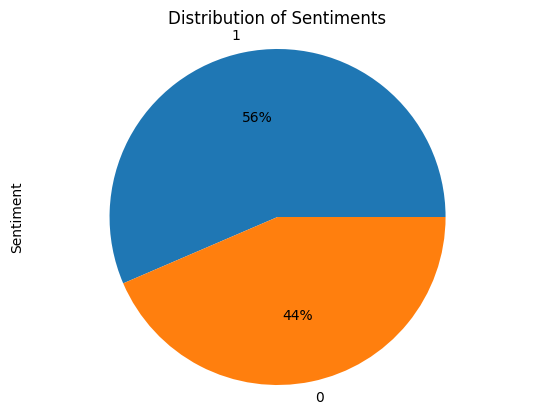

In [ ]:
# Get distribution of sentiments
sent_distribution = train_df['Sentiment'].value_counts(normalize=True)

# Plot distribution
sent_distribution.plot(kind='pie',autopct='%1.0f%%')
plt.title('Distribution of Sentiments')
plt.axis('equal')
plt.show()


The data is relatively well-balanced, with positive (56%) and negative (44%) sentiments.

***2) Word Preprocess and Analysis:*** We will separate the sentence into words


In [ ]:
# We will eliminate emotioncs and add them as a different feature
emoticons = set([
    ':-)', ':)', ':D', '=)', '=D', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', '8-D', 'x-D', 'XD', '=-D', '=D', '=-3', '=3', ':-))', ":'-)", ":')", ':*',
    ':^*', '>:P', ':-P', ':P', 'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)',
    '>;)', '>:-)', '<3', ':(', ':-(', ':[', ':{', ':-||', '=L', ':<', ':-[', ':-<', '=\\', '=/',
    '>:(', '>.<', ":'-(", ":'(", ':\\', ':-c', ':c', ':{', '>:\\', ';(', ':L', ':-/', '>:/', ':S',
    '>:[', ':@', ':-||', '=L', ':<', ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(",
    ':\\', ':-c', ':c', ':{', '>:\\', ';(', '^_^', '^-^', '^_~', '(:', '(-:', ':o)', 'D:', "D-':",
    'DX', 'D8', 'D;', 'D=', 'v_v', ':O', ':-O', ':-o', 'O_O', 'o-o', 'O_o', 'o_O', 'o.o', 'O.O',
    'o_0', '0_o', 'o_0', ':E', 'XP', 'xp', ';)', ';-)', ';]', ';D', ';p', ';P', ';o', ';O', ';-p',
    ';-P', 'B-)', '8)', '8-)', 'B)', ':-|', ':|', ':/', ':-/', ':\\', ':-\\', '>:/', '>:\\', '>.<',
    '>_<', 'T_T', 'T-T', '>:[', '>:O', '>:o', '>:P', '>:p', '>:)', '>;)', '>:D', '</3', ':-|', ':|',
    ':-/', ':/', ':-\\', ':\\', ':-p', ':p', ':-d', ':d', ':-D', ':D', ':-o', ':o', ':-O', ':O',
    ':-0', ':0', ':-)', ':)', ':-]', ':]', ':-3', ':3', ':->', ':>', ':-}', ':}', ':-)', ':)',
    ':-))', ':))', ':-(', ':(', ':-((', ':((', ':-c', ':c', ':-<', ':<', ':-[', ':[', ':-\\', ':\\',
    ':-/', ':/', ':-|', ':|', ':-X', ':X', ':-#', ':#', ':-&', ':&', 'O:-)', 'O:)', '0:-3', '0:3',
    '0:-)', '0:)', '0;^)', '>:)', '>;)', '>:-)', '}:-)', '}:)', '3:-)', '3:)', '>:-]', '>]', '>;]',
    '>:)', '>;)', '>:-)', '>:-(', '>:(', '>;(', '>:-/', '>:/', '>;/', '>:\\', '>;\\', '>:|', '>;|',
    '>:(', '>;(', '>:-(', '>:-)', '>;)', '>;)'])


emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
])

emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
])

all_emoticons = emoticons_happy.union(emoticons_sad).union(emoticons)

emoticon_pattern = re.compile(
    r'(' +
    r'T[_]T' +
    r'|[:;=Xx8][-~]?[)DPOop(/\\|{}]' +
    r'|[(/\\|{}][-~]?[:;=Xx8]' +
    r'|' + '|'.join(re.escape(emoticon) for emoticon in all_emoticons) +  # Matches specific emoticons from the sets
    r')',
    flags=re.IGNORECASE
)


In [ ]:
# We will use regex to eliminate links from our database
link_pattern = re.compile(r'https?://\S+|www\.\S+')
# We will also eliminnate all non alphanumeric characters except ! and ?, they could carry some important prediction power
non_alphanumeric = re.compile(r'[^a-zA-Z!?]')
# We will also eliminate hashtags and mentions, and add them as other feature
hashtag_pattern = re.compile(r'#\w+')
mention_pattern = re.compile(r'@\w+')


# We will also initialize a lemmatizer object, with this we can reduce words to its dictionary form reducing the number of different words for the same meaning.
lemmatizer = WordNetLemmatizer()

# Then we will lower all words, eliminate links, eliminate non alphanumeric characters and tokenize the text to get the words
train_df['words'] = train_df['SentimentText']\
    .apply(lambda x: x.lower())\
    .apply(lambda x: emoticon_pattern.sub('',x))\
    .apply(lambda x: link_pattern.sub('',x))\
    .apply(lambda x: hashtag_pattern.sub('',x))\
    .apply(lambda x: mention_pattern.sub('',x))\
    .apply(lambda x: non_alphanumeric.sub(' ',x))\
    .apply(lambda x: word_tokenize(x))\
    #.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Now we create another column with word lenght per twitter, we DON'T eliminate stopwords because they can have important effects on the
# the sentiment implied in each twitter
train_df['word_count'] = train_df['words'].apply(lambda x: len(x))

In [ ]:
train_df['words']

ItemID
1                                                                                                                             [is, so, sad, for, my, apl, friend]
2                                                                                                                            [i, missed, the, new, moon, trailer]
3                                                                                                                                             [omg, its, already]
4                                  [omgaga, im, sooo, im, gunna, cry, i, ve, been, at, this, dentist, since, i, was, suposed, just, get, a, crown, put, on, mins]
5                                                                                                               [i, think, mi, bf, is, cheating, on, me, !, !, !]
                                                                                   ...                                                                           
99996                

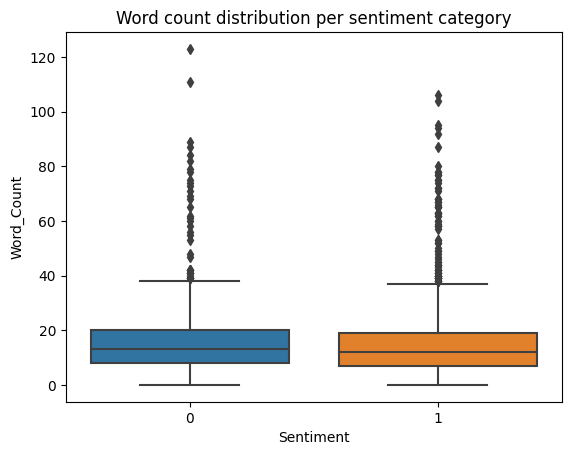

In [ ]:
# Now we plot to know if there is any difference between categories
sns.boxplot(data=train_df, x='Sentiment',y='word_count')
plt.title('Word count distribution per sentiment category')
plt.ylabel('Word_Count')
plt.xlabel('Sentiment')
# There are some outliers, but they are not the point of this section of the analysis

plt.show()

In [ ]:
medians = train_df.groupby('Sentiment')['word_count'].median()
print(f'Median word count Negative Sentiment:{medians[0]}, while positive: {medians[1]}')

Median word count Negative Sentiment:13.0, while positive: 12.0


While there is a difference, it's not substantial. Average lenght remains constant across categories. There is a presence of multiple outliers. Let's take a look at the outliers and decide what to do with them

In [ ]:
# We will take a look at the outliers per category
# Negative Sentiment
Q1_0 = train_df[train_df['Sentiment']==0]['word_count'].quantile(0.25)
Q3_0 = train_df[train_df['Sentiment']==0]['word_count'].quantile(0.75)
IQR_0 = Q3_0 - Q1_0
LB_0 = Q1_0 - 1.5*IQR_0
UB_0 = Q3_0 + 1.5*IQR_0

# Filter for outliers:
outliers_0 = train_df[(train_df['Sentiment']==0)&((train_df['word_count']<LB_0) | (train_df['word_count']>UB_0))]
# We want to display all the whole message
pd.set_option('display.max_colwidth', None)
outliers_0




,Sentiment,SentimentText,words,word_count
ItemID,,,,
365,0,bye guys!!!! i'ma miss ya'll sooo sooo much! but don't worry i'll be back on monday!!! have an awesome weekend!!! peace!!!!,"[bye, guys, !, !, !, !, i, ma, miss, ya, ll, sooo, sooo, much, !, but, don, t, worry, i, ll, be, back, on, monday, !, !, !, have, an, awesome, weekend, !, !, !, peace, !, !, !, !]",40
3038,0,NICK BRAUN'S TWITTER IS BEING BLOCKED!!!!!! I LOVE HIM!!!!!!!!!!!!!!!!!! THIS SUCKS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!,"[nick, braun, s, twitter, is, being, blocked, !, !, !, !, !, !, i, love, him, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, this, sucks, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !]",89
4056,0,WHAHHH!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! NOO!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!,"[whahhh, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, noo, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !, !]",78
4273,0,!!!!!!!!!! OMG!!!!!!! I lost all of my photage and stuff for the new video that was coming out monday... sorry guys looks like no new vid,"[!, !, !, !, !, !, !, !, !, !, omg, !, !, !, !, !, !, !, i, lost, all, of, my, photage, and, stuff, for, the, new, video, that, was, coming, out, monday, sorry, guys, looks, like, no, new, vid]",42
8238,0,THEY LOST!! I Cant believe LeBron and the Cavs lost Im so sad right now yo lol damn man.. Oh well. Let's get it Lakers! KOBE!!!!!!!!!,"[they, lost, !, !, i, cant, believe, lebron, and, the, cavs, lost, im, so, sad, right, now, yo, lol, damn, man, oh, well, let, s, get, it, lakers, !, kobe, !, !, !, !, !, !, !, !, !]",39
8837,0,"brokeback mountain was terrible.\n8838,0,Sentiment140,# @Catherine42 I wouldn't mind but I only had 1/2 a portion &amp; then left 1/2 the cream just fruit for me then until my hols x\n8839,1,Sentiment140,# @DeliciousLunch ... dark chocolate cookies? oh you tease! I'm writing to day n dipping into twitter for company \n8840,1,Sentiment140,# followfriday @mstuyvenberg @feb_unsw @hazelmail @beckescreet - all almost as cool as he-man and she-ra \n8841,1,Sentiment140,# followfriday @presentsqueen because she talks sense \n8842,1,Sentiment140,# New York is the most amazing city i've ever been to \n8843,0,Sentiment140,# number times I bottomed out just in our driveway = 4... a 6.5 hour trip to mass.. I'm scared \n8844,0,Sentiment140,# of NYC celebrity street vendors &gt; # of POA celebrities http://streetvendor.org/media/pdfs/Side2.pdf\n8845,1,Sentiment140,###### yay ##### thanks @matclayton ##### \n8846,0,Sentiment140,#$%#$^#%@ I HATE THE DENTIST","[brokeback, mountain, was, terrible, sentiment, i, wouldn, t, mind, but, i, only, had, a, portion, amp, then, left, the, cream, just, fruit, for, me, then, until, my, hols, x, sentiment, dark, chocolate, cookies, ?, oh, you, tease, !, i, m, writing, to, day, n, dipping, into, twitter, for, company, sentiment, followfriday, all, almost, as, cool, as, he, man, and, she, ra, sentiment, followfriday, because, she, talks, sense, sentiment, new, york, is, the, most, amazing, city, i, ve, ever, been, to, sentiment, number, times, i, bottomed, out, just, in, our, driveway, a, hour, trip, to, mass, i, m, scared, sentiment, of, ...]",123
16313,0,"?? ???? ????? ??? Rock &amp; Roll ? ?????? ?? RE:TV, ?? ???? ?? ??? ??????? ????????? ??? ???????...","[?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, rock, amp, roll, ?, ?, ?, ?, ?, ?, ?, ?, ?, re, tv, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?]",65
16318,0,"??? ?????????? ???????????? Win7 ?????? ???? Coherence ????????. ??????, ????, ??? ????? http://plurk.com/p/wwzlr","[?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, win, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, cohere

The tweet is a concatenation of multiple tweets with varying sentiments, since it's labeled under a single sentiment. We will remove this outlier to maintain data quality and ensure consistent training for the model

In [ ]:
# Now we do the same for positive sentiments
Q1_1 = train_df[train_df['Sentiment']==1]['word_count'].quantile(0.25)
Q3_1 = train_df[train_df['Sentiment']==1]['word_count'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1
LB_1 = Q1_1 - 1.5*IQR_1
UB_1 = Q3_1 + 1.5*IQR_1

# Filter for outliers:
outliers_1 = train_df[(train_df['Sentiment']==1)&((train_df['word_count']<LB_1) | (train_df['word_count']>UB_1))]
outliers_1


,Sentiment,SentimentText,words,word_count
ItemID,,,,
218,1,@kcome ?????????????????????????????????? ????????????1000 Followers???????????? http://tr.im/mWKn,"[?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, followers, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, http, tr, im, mwkn]",63
6703,1,#followfriday @krystynchong she's a star ????????????????ï¿½ï¿½ï¿½???????????????????????????????????????????????????????,"[she, s, a, star, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?]",75
8065,1,#ThaiPBS ??????????????????????????????????????????????????? ?????????????????????????????,"[?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?]",80
8286,1,&quot;????? ????? ?? TV?&quot; http://gombeto.com/?p=357 by @gombeto ?????? ?????? ?? ????????,"[quot, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, tv, ?, quot, http, gombeto, com, ?, p, by, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?]",44
9481,1,&quot;Can I have a biscuit?&quot; &quot;No you cannot.&quot; &quot;Some tea?&quot; &quot;No you cannot.&quot; &quot;A lick?&quot; &quot;No you cannot.&quot; Aw this is brilliant.,"[quot, can, i, have, a, biscuit, ?, quot, quot, no, you, can, not, quot, quot, some, tea, ?, quot, quot, no, you, can, not, quot, quot, a, lick, ?, quot, quot, no, you, can, not, quot, aw, this, is, brilliant]",40
...,...,...,...,...
88511,1,"@azendabb: nï¿½i chung a ch? bi?t, d?o nï¿½y ?i ?ï¿½u c?ng ph?i mang ï¿½o m?a theo... Anh ?ang ??nh khoan m?y l? trï¿½n t??ng ?? g?n thï¿½m qu?t mï¿½y","[n, i, chung, a, ch, ?, bi, ?, t, d, ?, o, n, y, ?, i, ?, u, c, ?, ng, ph, ?, i, mang, o, m, ?, a, theo, anh, ?, ang, ?, ?, nh, khoan, m, ?, y, l, ?, tr, n, t, ?, ?, ng, ?, ?, g, ?, n, th, m, qu, ?, t, m, y]",60
95389,1,"@crashover ??? ????????? ?????????, ??????. ??? ??? ???? ????? ??????, ? ?????? ?????????? ???????????, ?? ????????? ??????? ???? ??????","[?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ...]",104
95390,1,@crashover ?????? ?????? ????? ????? ????? ??????. ? ???? ????? ??????????,"[?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?]",53


In [ ]:
#Drop Outliers
train_df = train_df.drop(outliers_0.index)
train_df = train_df.drop(outliers_1.index)

***3) Hashtags and mentions***

In [ ]:
# Let's create both features (Hashtags & Mentions)
train_df["hashtags"] = train_df['SentimentText'].apply(lambda x: x.split(" ")).apply(lambda words: [word for word in words if word.startswith("#")])
train_df["mentions"] = train_df['SentimentText'].apply(lambda x: x.split(" ")).apply(lambda words: [word for word in words if word.startswith("@")])

train_df["hashtags_dummy"] = train_df['hashtags'].apply(lambda x: 1 if len(x) > 0 else 0)
train_df["mentions_dummy"] = train_df['mentions'].apply(lambda x: 1 if len(x) > 0 else 0)


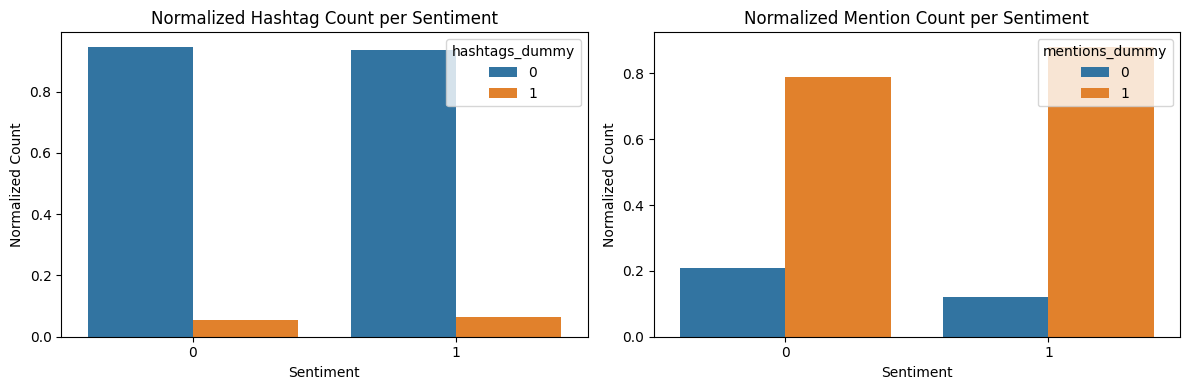

In [ ]:
# Normalization to notice if there are differences in distribution between sentiment
hashtag_count_df = train_df.groupby(['Sentiment', 'hashtags_dummy']).size().reset_index(name='count')
hashtag_count_df['norm_count'] = hashtag_count_df.groupby('Sentiment')['count'].transform(lambda x: x / x.sum())

mentions_count_df = train_df.groupby(['Sentiment', 'mentions_dummy']).size().reset_index(name='count')
mentions_count_df['norm_count'] = mentions_count_df.groupby('Sentiment')['count'].transform(lambda x: x / x.sum())


# Plot the normalized count as a bar plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=hashtag_count_df, x='Sentiment', y='norm_count', hue='hashtags_dummy', ax=axes[0])
axes[0].set_title('Normalized Hashtag Count per Sentiment')
axes[0].set_ylabel('Normalized Count')
axes[0].set_xlabel('Sentiment')

sns.barplot(data=mentions_count_df, x='Sentiment', y='norm_count', hue='mentions_dummy', ax=axes[1],)
axes[1].set_title('Normalized Mention Count per Sentiment')
axes[1].set_ylabel('Normalized Count')
axes[1].set_xlabel('Sentiment')

# Show the plots
plt.tight_layout()
plt.show()

The idea is to check if there are differences in the distribution of the dummies per sentiment. For the hashtags, it suggest that there are not strong relationships between sentiment and the presence of hashtags, while in the case of mentions, when the sentiment is positive (1) there is a higher percentage of mentions.
\
Now we will add face emojis as a separate feature

In [ ]:
train_df['face_emojis'] = train_df['SentimentText'].apply(lambda x: emoticon_pattern.findall(x))

In [ ]:
train_df

,Sentiment,SentimentText,words,word_count,hashtags,mentions,hashtags_dummy,mentions_dummy,face_emojis
ItemID,,,,,,,,,
1,0,is so sad for my APL friend.............,"[is, so, sad, for, my, apl, friend]",7,[],[],0,0,[]
2,0,I missed the New Moon trailer...,"[i, missed, the, new, moon, trailer]",6,[],[],0,0,[]
3,1,omg its already 7:30 :O,"[omg, its, already]",3,[],[],0,0,"[:3, :O]"
4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,"[omgaga, im, sooo, im, gunna, cry, i, ve, been, at, this, dentist, since, i, was, suposed, just, get, a, crown, put, on, mins]",23,[],[],0,0,[]
5,0,i think mi bf is cheating on me!!! T_T,"[i, think, mi, bf, is, cheating, on, me, !, !, !]",11,[],[],0,0,[T_T]
...,...,...,...,...,...,...,...,...,...
99996,0,@Cupcake seems like a repeating problem hope you're able to find something.,"[seems, like, a, repeating, problem, hope, you, re, able, to, find, something]",12,[],[@Cupcake],0,1,[]
99997,1,"@cupcake__ arrrr we both replied to each other over different tweets at the same time , i'll see you then, Duno where the hell Kateyy is!","[arrrr, we, both, replied, to, each, other, over, different, tweets, at, the, same, time, i, ll, see, you, then, duno, where, the, hell, kateyy, is, !]",26,[],[@cupcake__],0,1,[]
99998,0,@CuPcAkE_2120 ya i thought so,"[ya, i, thought, so]",4,[],[@CuPcAkE_2120],0,1,[]


## Section 2: Modeling
First thing we will need to do is to prepare the features, for the non numeric features we will use TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
import joblib

# Vectorize Variables
train_df['words_txt'] = train_df['words'].apply(lambda x: ' '.join(x))

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=50000)
TF_IDF_Vector = tfidf_vectorizer.fit_transform(train_df['words_txt'])
other_features = train_df[['hashtags_dummy', 'mentions_dummy', 'word_count']]

# Save the TF-IDF vectorizer to a file
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


# Then we define dependent and independent variables
X = hstack([TF_IDF_Vector, other_features])
y = train_df['Sentiment']

# And finally we separate into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

### ***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(max_iter=5000)
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
LR_y_pred = LR_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, LR_y_pred))
print(classification_report(y_test, LR_y_pred))

Accuracy: 0.7609969464388875
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      5524
           1       0.76      0.82      0.79      6593

    accuracy                           0.76     12117
   macro avg       0.76      0.76      0.76     12117
weighted avg       0.76      0.76      0.76     12117



### ***Binomial Naive Bayes***

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
# Predict on the test set
NB_y_pred = nb_model.predict(X_test)

# Evaluation
print("Accuracy NB:", accuracy_score(y_test, NB_y_pred))
print(classification_report(y_test, NB_y_pred))


Accuracy NB: 0.7343401832136668
              precision    recall  f1-score   support

           0       0.78      0.58      0.67      5524
           1       0.71      0.86      0.78      6593

    accuracy                           0.73     12117
   macro avg       0.74      0.72      0.72     12117
weighted avg       0.74      0.73      0.73     12117



### ***Linear Support Vector Machine***


In [ ]:
from sklearn.svm import LinearSVC

# Initialize the LinearSVC model
linear_svc = LinearSVC(random_state=123)

# Train the model
linear_svc.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=123)

In [ ]:
# Predict on the test set
LSVC_y_pred = linear_svc.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test,  LSVC_y_pred))
print(classification_report(y_test, LSVC_y_pred))


Accuracy: 0.7519187917801436
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      5524
           1       0.75      0.81      0.78      6593

    accuracy                           0.75     12117
   macro avg       0.75      0.75      0.75     12117
weighted avg       0.75      0.75      0.75     12117



### ***CatBoost***

In [ ]:
X_CB = train_df.copy()
X_CB.drop('Sentiment',axis = 1,inplace = True)
y_CB = train_df['Sentiment']
X_train_CB, X_test_CB, y_train_CB, y_test_CB = train_test_split(X, y,test_size=0.2, random_state=123)

In [ ]:
from catboost import CatBoostClassifier

# Initialize CatBoost classifier instance
CB_model = CatBoostClassifier(iterations=2000,
                              learning_rate=0.1,
                              eval_metric='Accuracy',
                              random_seed=123,
                              task_type='GPU')

CB_model.fit(X_train_CB, y_train_CB, eval_set=(X_test_CB, y_test_CB), verbose=100)

In [ ]:
 # Predict on the test set
CB_y_pred = CB_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_CB, CB_y_pred))
print(classification_report(y_test_CB, CB_y_pred))

Let's try to get the best hyperparameters. To do this, we will first do a systematic grid search

In [ ]:
#We set up the iterations values and learning rates we will try, and create an empty variable for the results
iteration_ranges = [500, 1000, 1500, 2000]
learning_rate_ranges = [0.01, 0.05, 0.1, 0.2]

results = []

In [ ]:
#We apply the cat boost as per the different possible iterations and learning rates

#Apply the CatBoost model for the different possible iterations and learning rates
for iteration in iteration_ranges:
    for learning_rate in learning_rate_ranges:

        #Initialize the CatBoost model
        CB_model_iterates = CatBoostClassifier(iterations=iteration,
                                               learning_rate=learning_rate,
                                               eval_metric='Accuracy',
                                               random_seed=123,
                                               task_type='GPU')

        #Fit the model to the data
        CB_model_iterates.fit(X_train_CB, y_train_CB, eval_set=(X_test_CB, y_test_CB), verbose=100)

        #Evaluate the model's performance
        predictions = CB_model_iterates.predict(X_test_CB)
        accuracy = accuracy_score(y_test_CB, predictions)

        #Store each result combination in the results list
        results.append({'iterations': iteration, 'learning_rate': learning_rate, 'accuracy': accuracy})




In [ ]:
#Show Results per combination

results_df = pd.DataFrame(results)
print(results_df)



After extensive simulations, we can observe the best accuracy we achieved was with 2000 iterations and a learning rate of .2. We will continue this line of thought for further testing.

We will do a fine tuning round .2 learning rate and 2000 iteration

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Let's try tweaking around our best parameters to see if we get something better
iteration_ranges = [2000, 2200, 2500]
learning_rate_ranges = [0.18, 0.2, 0.22, 0.25, 0.3]

results = []  # Let's keep track of what we get

for iteration in iteration_ranges:
    for learning_rate in learning_rate_ranges:

        # Setting up CatBoost with the current combo of iteration and learning rate
        CB_model_iterates = CatBoostClassifier(iterations=iteration,
                                               learning_rate=learning_rate,
                                               eval_metric='Accuracy',
                                               random_seed=123,
                                               task_type='GPU')

        # Time to train the model
        CB_model_iterates.fit(X_train_CB, y_train_CB, eval_set=(X_test_CB, y_test_CB), verbose=100)

        # Let's see how well this one did
        predictions = CB_model_iterates.predict(X_test_CB)
        accuracy = accuracy_score(y_test_CB, predictions)

        # Stashing the results for later
        results.append({'iterations': iteration, 'learning_rate': learning_rate, 'accuracy': accuracy})

# Let's make these results easy to look at
results_df = pd.DataFrame(results)

# Sorting to find the best one quickly
results_df = results_df.sort_values(by='accuracy', ascending=False)

# Show me what we've got!
print(results_df)


We finalize with an optimatimal hyperparameters of .18 learning rate at 2500 iterations, yielding an accuracy of 77%. As another way to increase accuracy, we will do oversampling of the minority class via SMOTE to see if we get better results with the optimal parameters

In [ ]:
from imblearn.over_sampling import SMOTE

#Re-starting my train test sets
X_train_CB, X_test_CB, y_train_CB, y_test_CB = train_test_split(X, y,test_size=0.2, random_state=123)

#Applying SMOTE to the training data
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train_CB, y_train_CB)


In [ ]:
from collections import Counter

# Count the occurrences of each class
counter_after_smote = Counter(y_train_smote)

# Prepare data for the pie chart
labels = counter_after_smote.keys()
sizes = counter_after_smote.values()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution After Applying SMOTE')
plt.show()

We can now observe a perfectuly distributed sample. Now, we will use this in our model using our previous best hyperparameters

We do not observe a increase in the accuracy with oversampling, rather a decrease to 76%. Thus, we can consider that the 77% accruracy with the original sampling is the best option

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions = {
    'iterations': np.arange(1800, 2201, 50),  # Range around 2000, with steps of 50
    'learning_rate': uniform(0.19, 0.30)      # Continuous range from 0.15 to 0.25
}

In [ ]:
# Initialize the CatBoost Classifier
cb = CatBoostClassifier(eval_metric='Accuracy', random_seed=123, task_type='GPU')

# Set up RandomizedSearchCV with the aformention distributions
random_search = RandomizedSearchCV(
    cb, param_distributions, n_iter=20,
    scoring='accuracy', cv=3, verbose=100, random_state=123)

#Implementing the randomized search
random_search.fit(X_train_CB, y_train_CB)

# Get the best parameters and the corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)



Final Model used: Optimatimal hyperparameters of .18 learning rate at 2500 iterations, yielding an accuracy of 77%.

In [ ]:
X_train_CB, X_test_CB, y_train_CB, y_test_CB = train_test_split(X, y,test_size=0.2, random_state=123)

# Initialize CatBoost classifier instance
CB_model = CatBoostClassifier(iterations=2500,
                              learning_rate=0.18,
                              eval_metric='Accuracy',
                              random_seed=123,
                              task_type='GPU')

# Fit the model on your data
CB_model.fit(X_train_CB, y_train_CB, eval_set=(X_test_CB, y_test_CB), verbose=100)

0:	learn: 0.6273403	test: 0.6197437	best: 0.6197437 (0)	total: 118ms	remaining: 4m 53s
100:	learn: 0.7399254	test: 0.7269223	best: 0.7271225 (99)	total: 6.79s	remaining: 2m 41s
200:	learn: 0.7627778	test: 0.7429415	best: 0.7434421 (194)	total: 11.5s	remaining: 2m 11s
300:	learn: 0.7748423	test: 0.7484982	best: 0.7490989 (281)	total: 16.1s	remaining: 1m 57s
400:	learn: 0.7822637	test: 0.7542551	best: 0.7547056 (397)	total: 23.1s	remaining: 2m 1s
500:	learn: 0.7872572	test: 0.7555567	best: 0.7555567 (500)	total: 29s	remaining: 1m 55s
600:	learn: 0.7925886	test: 0.7567581	best: 0.7571586 (578)	total: 35.6s	remaining: 1m 52s
700:	learn: 0.7956172	test: 0.7574089	best: 0.7576091 (691)	total: 39.8s	remaining: 1m 42s
800:	learn: 0.7999474	test: 0.7585102	best: 0.7585603 (799)	total: 45.5s	remaining: 1m 36s
900:	learn: 0.8025380	test: 0.7591610	best: 0.7593112 (879)	total: 52.8s	remaining: 1m 33s
1000:	learn: 0.8059296	test: 0.7596616	best: 0.7604125 (946)	total: 58.2s	remaining: 1m 27s
1100:	

## Section 3: Generalization and Application
Now that we selected our final model and is well-tuned. We will continue doing the predictions on unseen data and some application

In [ ]:
test_df =pd.read_csv('Fifa_WC_2022_F.csv',encoding='ISO-8859-1',index_col='ItemID')

In [ ]:
# data preparation for the test data
test_df['words'] = test_df['Tweet']\
    .apply(lambda x: x.lower())\
    .apply(lambda x: emoticon_pattern.sub('',x))\
    .apply(lambda x: link_pattern.sub('',x))\
    .apply(lambda x: hashtag_pattern.sub('',x))\
    .apply(lambda x: mention_pattern.sub('',x))\
    .apply(lambda x: non_alphanumeric.sub(' ',x))\
    .apply(lambda x: word_tokenize(x))\
    #.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
# Feature engineering of all features
test_df['word_count'] = test_df['words'].apply(lambda x: len(x))
test_df["hashtags"] = test_df['Tweet'].apply(lambda x: x.split(" ")).apply(lambda words: [word for word in words if word.startswith("#")])
test_df["mentions"] = test_df['Tweet'].apply(lambda x: x.split(" ")).apply(lambda words: [word for word in words if word.startswith("@")])

test_df["hashtags_dummy"] = test_df['hashtags'].apply(lambda x: 1 if len(x) > 0 else 0)
test_df["mentions_dummy"] = test_df['mentions'].apply(lambda x: 1 if len(x) > 0 else 0)

test_df['face_emojis'] = test_df['Tweet'].apply(lambda x: emoticon_pattern.findall(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Vectorize Variables
test_df['words_txt'] = test_df['words'].apply(lambda x: ' '.join(x))

# Transform features using the loaded vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
TF_IDF_Vector_test = loaded_vectorizer.transform(test_df['words_txt'])
other_features_test = test_df[['hashtags_dummy', 'mentions_dummy', 'word_count']]

# Combine TF-IDF features and other features
F_WC_Data = hstack([TF_IDF_Vector_test, other_features_test])


In [ ]:
# Predicting labels for each tweet
y_pred = CB_model.predict(F_WC_Data)

In [ ]:
# Add Predicted Sentiment to my test df
test_df['Predicted Sentiment'] = y_pred

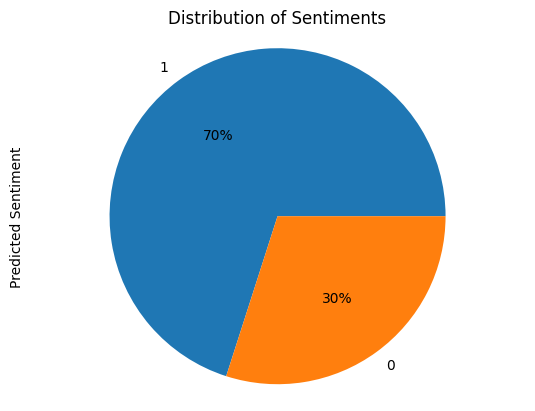

In [ ]:
# Let's take a loot at the sentiment distribution
sent_distribution_test = test_df['Predicted Sentiment'].value_counts(normalize=True)

# Plot distribution
sent_distribution_test.plot(kind='pie',autopct='%1.0f%%')
plt.title('Distribution of Sentiments')
plt.axis('equal')
plt.show()

Ok, so 70% of my predictions are positive and 30% negative. Now we are going to add a column for each country to analyze the labes of each one

In [ ]:
test_df.head()

,Tweet,words,word_count,hashtags,mentions,hashtags_dummy,mentions_dummy,face_emojis,words_txt,Predicted Sentiment
ItemID,,,,,,,,,,
1,Amazing @CanadaSoccerEN #WorldCup2022 launch video. Shows how much the face of Canada and our menâs national team have changed since our last World Cup entry in 1986. Canât wait to see these boys in action!\n\nThis is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8,"[amazing, launch, video, shows, how, much, the, face, of, canada, and, our, men, s, national, team, have, changed, since, our, last, world, cup, entry, in, can, t, wait, to, see, these, boys, in, action, !, this, is, canada, fifa, world, cup, opening, video, https, t, co, g, vvwtg]",48,[#WorldCup2022],[@CanadaSoccerEN],1,1,[:/],amazing launch video shows how much the face of canada and our men s national team have changed since our last world cup entry in can t wait to see these boys in action ! this is canada fifa world cup opening video https t co g vvwtg,1
2,Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU,"[worth, reading, while, watching, https, t, co, sqrna, dyu]",9,[#WorldCup2022],[],1,0,[:/],worth reading while watching https t co sqrna dyu,1
3,Golden Maknae shinning bright\n\nhttps://t.co/4AyZbzGTX4\n#JeonJungkook #Jungkook #ì ì êµ­ #ì êµ­ #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #ë°©íìë ë¨ #WorldCup2022 #FIFAKOOK \n@BTS_twt,"[golden, maknae, shinning, bright, https, t, co, ayzbzgtx]",8,"[#Jungkook, #ì ì êµ­, #ì êµ­, #JK, #GoldenMaknae, #bunny, #Kookie, #Jungshook, #BTS, #ë°©íìë ë¨, #WorldCup2022, #FIFAKOOK]",[],1,0,[:/],golden maknae shinning bright https t co ayzbzgtx,1
4,"If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony?? https://t.co/f72P03ZN2k","[if, the, bbc, cares, so, much, about, human, rights, homosexual, rights, and, women, rights, then, why, not, say, these, before, the, opening, ceremony, ?, ?, why, are, they, saying, these, during, the, opening, ceremony, ?, ?, why, did, the, bbc, censor, the, opening, ceremony, ?, ?, https, t, co, f, p, zn, k]",53,[#WorldCup2022],[],1,0,[:/],if the bbc cares so much about human rights homosexual rights and women rights then why not say these before the opening ceremony ? ? why are they saying these during the opening ceremony ? ? why did the bbc censor the opening ceremony ? ? https t co f p zn k,1
5,"And like, will the mexican fans be able to scream ""PUTO"" now? Or is that too homophobic for qatar? @FIFAWorldCup #WorldCup2022","[and, like, will, the, mexican, fans, be, able, to, scream, puto, now, ?, or, is, that, too, homophobic, for, qatar, ?]",21,[#WorldCup2022],[@FIFAWorldCup],1,1,[],and like will the mexican fans be able to scream puto now ? or is that too homophobic for qatar ?,1


In [ ]:
# List of World Cup teams
world_cup_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
    'England', 'Iran', 'USA', 'Wales',
    'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
    'France', 'Australia', 'Denmark', 'Tunisia',
    'Spain', 'Costa Rica', 'Germany', 'Japan',
    'Belgium', 'Canada', 'Morocco', 'Croatia',
    'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
    'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

# Function to get a list of mentioned countries in words
def get_mentioned_countries(words_list):
    mentioned_countries = []
    for country in world_cup_teams:
        if country.lower() in words_list:
            mentioned_countries.append(country)
    return mentioned_countries

In [ ]:
# Apply the function to create a new column with mentioned countries
test_df['mentioned_countries'] = test_df['words'].apply(get_mentioned_countries)

# Select Only rows that contains 1 country
test_df_with_countries = test_df[test_df['mentioned_countries'].apply(len) == 1]

# Select Only rows that contains 1 country
test_df_with_countries['mentioned_countries'] = test_df_with_countries['mentioned_countries'].apply(lambda x: x[0])


<ipython-input-152-64c25bc7255d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_with_countries['mentioned_countries'] = test_df_with_countries['mentioned_countries'].apply(lambda x: x[0])


In [ ]:
test_df_with_countries.head()

,Tweet,words,word_count,hashtags,mentions,hashtags_dummy,mentions_dummy,face_emojis,words_txt,Predicted Sentiment,mentioned_countries
ItemID,,,,,,,,,,,
1,Amazing @CanadaSoccerEN #WorldCup2022 launch video. Shows how much the face of Canada and our menâs national team have changed since our last World Cup entry in 1986. Canât wait to see these boys in action!\n\nThis is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8,"[amazing, launch, video, shows, how, much, the, face, of, canada, and, our, men, s, national, team, have, changed, since, our, last, world, cup, entry, in, can, t, wait, to, see, these, boys, in, action, !, this, is, canada, fifa, world, cup, opening, video, https, t, co, g, vvwtg]",48,[#WorldCup2022],[@CanadaSoccerEN],1,1,[:/],amazing launch video shows how much the face of canada and our men s national team have changed since our last world cup entry in can t wait to see these boys in action ! this is canada fifa world cup opening video https t co g vvwtg,1,Canada
5,"And like, will the mexican fans be able to scream ""PUTO"" now? Or is that too homophobic for qatar? @FIFAWorldCup #WorldCup2022","[and, like, will, the, mexican, fans, be, able, to, scream, puto, now, ?, or, is, that, too, homophobic, for, qatar, ?]",21,[#WorldCup2022],[@FIFAWorldCup],1,1,[],and like will the mexican fans be able to scream puto now ? or is that too homophobic for qatar ?,1,Qatar
26,Italy Vs France.\nMuch better than watching #WorldCup2022 https://t.co/tCjx3TnL8n,"[italy, vs, france, much, better, than, watching, https, t, co, tcjx, tnl, n]",13,[#WorldCup2022],[],1,0,[:/],italy vs france much better than watching https t co tcjx tnl n,1,France
35,England â @England #WorldCup2022 https://t.co/Zy3uPDRfWI,"[england, https, t, co, zy, updrfwi]",6,[#WorldCup2022],[@England],1,1,[:/],england https t co zy updrfwi,1,England
39,Good evening from Qatar #WorldCup2022 https://t.co/VZuzMKEbbw,"[good, evening, from, qatar, https, t, co, vzuzmkebbw]",8,[#WorldCup2022],[],1,0,[:/],good evening from qatar https t co vzuzmkebbw,1,Qatar


In [ ]:
# Calculate the repetition of sentiments per team
country_sentiment_counts = test_df_with_countries.groupby(['mentioned_countries', 'Predicted Sentiment']).size().reset_index(name='count')
# Display the resulting DataFrame
country_sentiment_counts['Predicted Sentiment'] = country_sentiment_counts['Predicted Sentiment'].apply(lambda x: 'negative' if x == 0 else 'positive')
country_sentiment_counts


,mentioned_countries,Predicted Sentiment,count
0,Argentina,negative,16
1,Argentina,positive,70
2,Australia,negative,1
3,Australia,positive,7
4,Belgium,negative,2
5,Belgium,positive,5
6,Brazil,negative,19
7,Brazil,positive,58
8,Cameroon,positive,5
9,Canada,negative,9


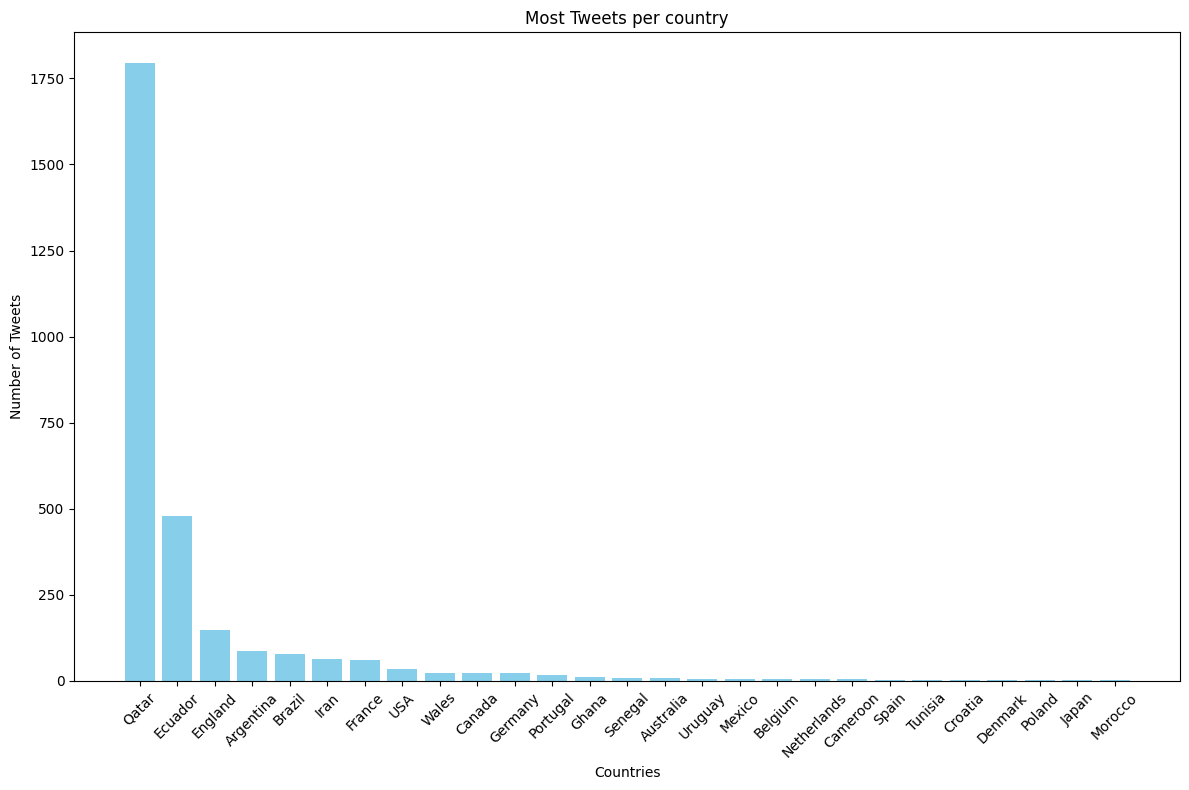

In [ ]:
# This DataFrame will contain the counts per sentiment per country
country_tweet_counts = country_sentiment_counts.groupby('mentioned_countries')['count'].sum().reset_index()

# Sort the DataFrame by count in descending order to get the countries with the most tweets on top
country_tweet_counts = country_tweet_counts.sort_values(by='count', ascending=False)

# Display the sorted DataFrame
plt.figure(figsize=(12, 8))
plt.bar(country_tweet_counts['mentioned_countries'], country_tweet_counts['count'], color='skyblue')
plt.title('Most Tweets per country')
plt.xlabel('Countries')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


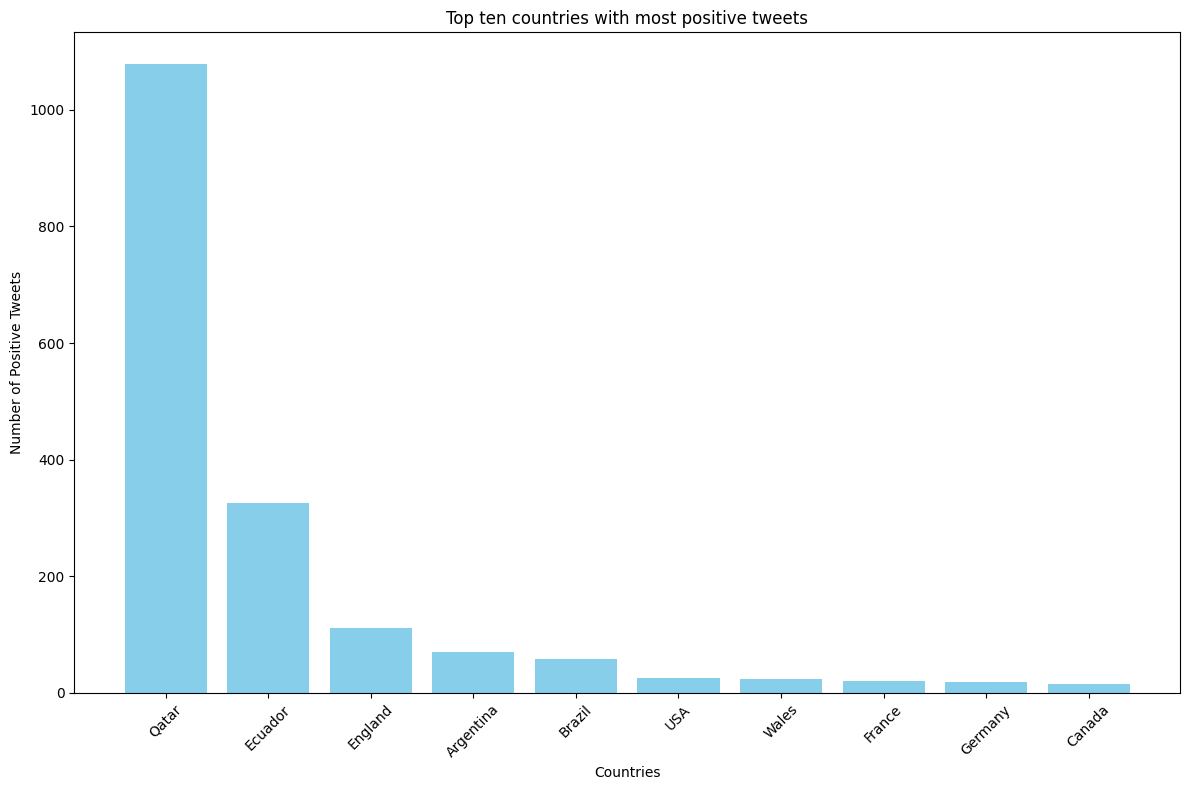

In [ ]:
# Top 10 Positive Tweeets
country_Positive_counts = country_sentiment_counts[country_sentiment_counts['Predicted Sentiment'] == 'positive'].sort_values(by='count', ascending=False)

country_Positive_counts = country_Positive_counts.head(10)

# Display the sorted DataFrame
plt.figure(figsize=(12, 8))
plt.bar(country_Positive_counts['mentioned_countries'], country_Positive_counts['count'], color='skyblue')
plt.title('Top ten countries with most positive tweets')
plt.xlabel('Countries')
plt.ylabel('Number of Positive Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


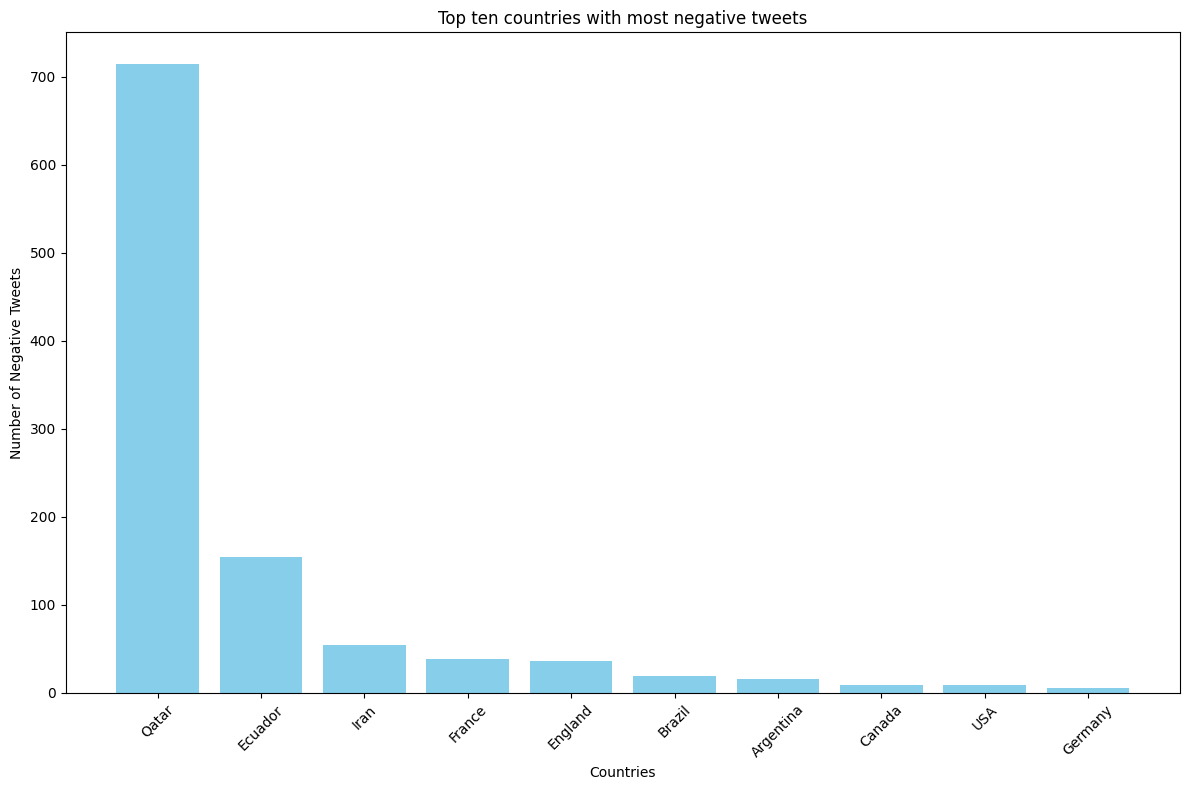

In [ ]:
# Top 10 Positive Tweeets
country_Negative_counts = country_sentiment_counts[country_sentiment_counts['Predicted Sentiment'] == 'negative'].sort_values(by='count', ascending=False)

country_Negative_counts = country_Negative_counts.head(10)

# Display the sorted DataFrame
plt.figure(figsize=(12, 8))
plt.bar(country_Negative_counts['mentioned_countries'], country_Negative_counts['count'], color='skyblue')
plt.title('Top ten countries with most negative tweets')
plt.xlabel('Countries')
plt.ylabel('Number of Negative Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
country_sentiment_counts.to_csv('country_sentiment_counts.csv', index=False)

# Download the file to your local system
files.download('country_sentiment_counts.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Separate the data into positive and negative sentiment dataframes
positive_data = country_sentiment_counts[country_sentiment_counts['Predicted Sentiment'] == 'positive']
negative_data = country_sentiment_counts[country_sentiment_counts['Predicted Sentiment'] == 'negative']

combined_data = positive_data.merge(negative_data, on='mentioned_countries', suffixes=('_positive', '_negative'))
combined_data['positive_ratio'] = combined_data['count_positive'] / (combined_data['count_positive'] + combined_data['count_negative'])
sorted_data = combined_data.sort_values(by='positive_ratio', ascending=False)

sorted_data


,mentioned_countries,Predicted Sentiment_positive,count_positive,Predicted Sentiment_negative,count_negative,positive_ratio
1,Australia,positive,7,negative,1,0.875000
0,Argentina,positive,70,negative,16,0.813953
17,Senegal,positive,7,negative,2,0.777778
9,Ghana,positive,10,negative,3,0.769231
6,England,positive,112,negative,36,0.756757
3,Brazil,positive,58,negative,19,0.753247
8,Germany,positive,18,negative,6,0.750000
18,Spain,positive,3,negative,1,0.750000
19,USA,positive,26,negative,9,0.742857
2,Belgium,positive,5,negative,2,0.714286


In [13]:
# Separate the data into positive and negative sentiment dataframes
positive_data = country_sentiment_counts[country_sentiment_counts['Predicted Sentiment'] == 'positive']
negative_data = country_sentiment_counts[country_sentiment_counts['Predicted Sentiment'] == 'negative']

combined_data = positive_data.merge(negative_data, on='mentioned_countries', suffixes=('_positive', '_negative'))
combined_data['positive_ratio'] = combined_data['count_positive'] / (combined_data['count_positive'] + combined_data['count_negative'])
combined_data['weighted_score'] = combined_data['positive_ratio'] * np.log(combined_data['count_positive'])

# Sort the countries based on the new weighted score
sorted_weighted_data = combined_data.sort_values(by='weighted_score', ascending=False)

sorted_weighted_data.head(10)


,mentioned_countries,Predicted Sentiment_positive,count_positive,Predicted Sentiment_negative,count_negative,positive_ratio,weighted_score
16,Qatar,positive,1079,negative,715,0.601449,4.200395
5,Ecuador,positive,325,negative,154,0.678497,3.924307
6,England,positive,112,negative,36,0.756757,3.570756
0,Argentina,positive,70,negative,16,0.813953,3.458078
3,Brazil,positive,58,negative,19,0.753247,3.058516
19,USA,positive,26,negative,9,0.742857,2.420300
8,Germany,positive,18,negative,6,0.750000,2.167779
9,Ghana,positive,10,negative,3,0.769231,1.771219
1,Australia,positive,7,negative,1,0.875000,1.702671
4,Canada,positive,15,negative,9,0.625000,1.692531
